In [29]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud


In [30]:
# Load the dataset
def load_dataset(filepath):
    """Load the dataset from a CSV file."""
    dataset = pd.read_csv(filepath)
    return dataset

In [31]:

def clean_dataset(dataset):
    """Clean the dataset by handling missing values."""
    dataset_cleaned = dataset.dropna(subset=['is_rumor', 'user.handle'])
    # Safely handle missing values for the 'topic' column
    if 'topic' in dataset_cleaned.columns:
        dataset_cleaned.loc[:, 'topic'] = dataset_cleaned['topic'].fillna('unknown')
    else:
        print("Warning: 'topic' column is missing in the dataset.")
    
    # Check if 'followers_count' exists before processing
    if 'followers_count' in dataset_cleaned.columns:
        dataset_cleaned.loc[:, 'followers_count'] = dataset_cleaned['followers_count'].fillna(0).astype(int)
    else:
        print("Warning: 'followers_count' column is missing in the dataset.")
    
    return dataset_cleaned


In [12]:

# Analyze rumor vs. non-rumor distribution
def analyze_rumor_distribution(dataset):
    """Analyze and visualize the distribution of rumor vs non-rumor tweets."""
    rumor_counts = dataset['is_rumor'].value_counts()
    rumor_counts.plot(kind='bar', color=['blue', 'orange'], alpha=0.7)
    plt.title("Rumor vs Non-Rumor Distribution")
    plt.xlabel("Category")
    plt.ylabel("Number of Tweets")
    plt.xticks([0, 1], ["Non-Rumor", "Rumor"], rotation=0)
    plt.tight_layout()
    plt.show()
    return rumor_counts


In [21]:
 #Identify top influencers
def identify_influencers(dataset):
    """Identify top influencers spreading misinformation."""
    if 'followers_count' in dataset.columns:
        column_name = 'followers_count'
    elif 'followers' in dataset.columns:
        column_name = 'followers'
    else:
        print("Error: No column for followers found in the dataset.")
        return
    
    influencers = dataset[dataset['is_rumor'] == 1]
    top_influencers = influencers.groupby('user.handle')[column_name].sum().sort_values(ascending=False).head(10)
    top_influencers.plot(kind='bar', color='purple', alpha=0.7)
    plt.title("Top Influencers Spreading Misinformation")
    plt.xlabel("User Handle")
    plt.ylabel("Total Followers")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    return top_influencers


In [25]:

# Analyze top topics
def identify_influencers_by_activity(dataset):
    """Identify top influencers based on tweet activity."""
    if 'user.handle' not in dataset.columns:
        print("Error: 'user.handle' column is missing in the dataset.")
        return
    
    influencers = dataset[dataset['is_rumor'] == 1]
    if influencers.empty:
        print("No rumor-related tweets found for analysis.")
        return
    
    top_influencers = influencers['user.handle'].value_counts().head(10)
    if top_influencers.empty:
        print("No user activity data available for top influencers.")
        return
    
    top_influencers.plot(kind='bar', color='purple', alpha=0.7)
    plt.title("Top 10 Users by Activity (Rumor Tweets)")
    plt.xlabel("User Handle")
    plt.ylabel("Number of Rumor Tweets")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return top_influencers



In [32]:

# Generate a word cloud for keywords in rumor tweets
def generate_wordcloud(dataset):
    """Generate a word cloud for keywords in rumor tweets."""
    rumor_texts = dataset[dataset['is_rumor'] == 1]['text']
    vectorizer = CountVectorizer(stop_words='english', max_features=20)
    keywords = vectorizer.fit_transform(rumor_texts).toarray()
    keyword_names = vectorizer.get_feature_names_out()
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(keyword_names))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud of Keywords in Rumor Tweets")
    plt.show()
    return keyword_names


Loading dataset...
Cleaning dataset...
Analyzing rumor distribution...


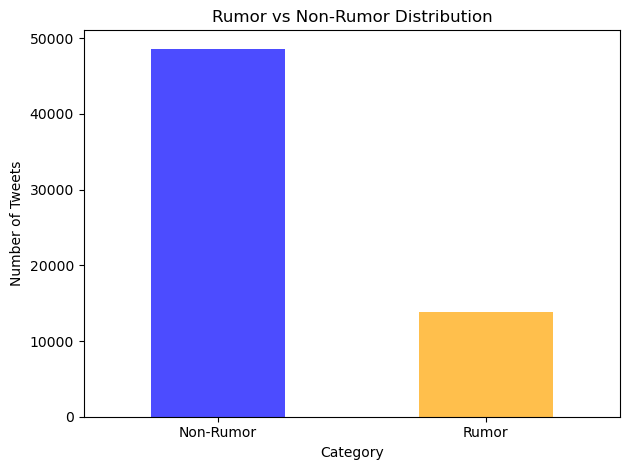

Identifying top influencers...
Error: No column for followers found in the dataset.
Analyzing top topics...


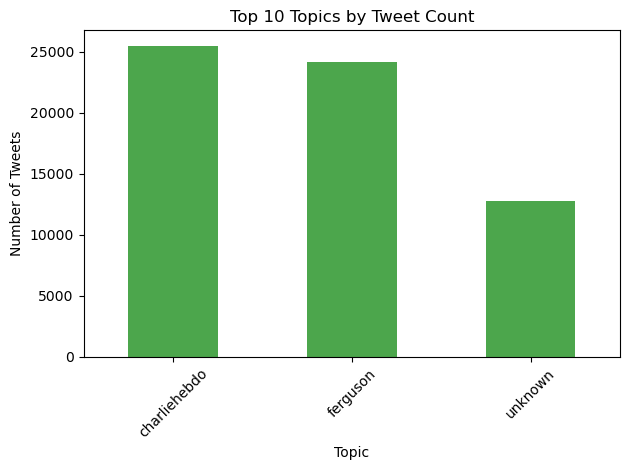

Generating word cloud...


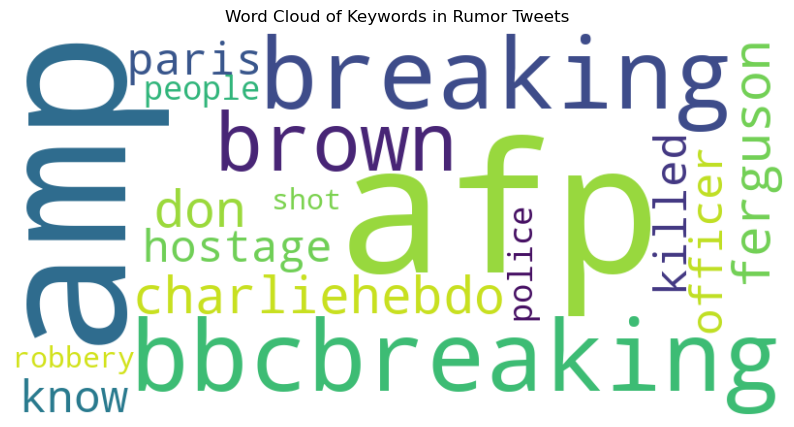

Identifying top influencers by activity...


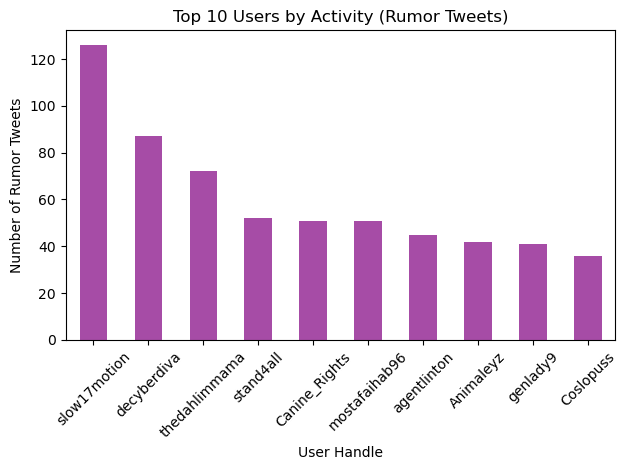

Analysis complete.


In [28]:

# Main function to run the analysis
def main():
    """Run the analysis on the dataset."""
    filepath = r"C:\Users\win 10\Downloads\dataset.csv"
    print("Loading dataset...")
    dataset = load_dataset(filepath)

    print("Cleaning dataset...")
    dataset_cleaned = clean_dataset(dataset)

    print("Analyzing rumor distribution...")
    analyze_rumor_distribution(dataset_cleaned)

    print("Identifying top influencers...")
    identify_influencers(dataset_cleaned)

    print("Analyzing top topics...")
    analyze_top_topics(dataset_cleaned)

    print("Generating word cloud...")
    generate_wordcloud(dataset_cleaned)

    print("Identifying top influencers by activity...")
    identify_influencers_by_activity(dataset_cleaned)


    print("Analysis complete.")

# If this script is executed directly, run the main function
if __name__ == "__main__":
    main()